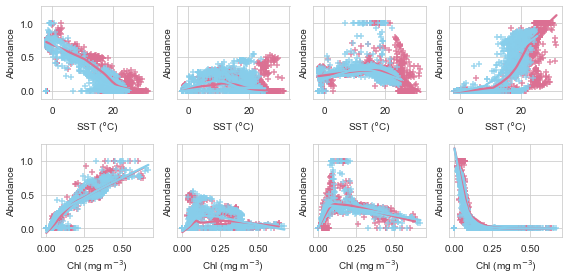

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from cgeniepy.core import GenieModel as gm
import seaborn as sns

# local adaption to temperature (given the same abundance, lower temperature needed)
# but consistent with GPP
# both adaption and migration!
fig, axes = plt.subplots(nrows=2, ncols=4, sharey=True, figsize=(8,4))
name_list = ["bn", "bs", "sn", "ss"]
env_list = ["ocn_sur_temp", "eco2D_Plankton_Chl_Total"]

mod_pi = gm("../model/8P7Z4F_dev_spinup")
mod_lgm = gm("../model/LGM_8P7Z4F")

for i, ax in enumerate(axes.flat):
    if i < 4:
        # plot modern model
        index = i
        foram = name_list[index]
        env = env_list[0]

        x = mod_pi.select_var(env).array
        y = mod_pi.select_foram(foram).export_c().proportion().array
        sns.regplot(x = np.ravel(x), y = np.ravel(y), ax=ax, lowess=True, marker="+", color="palevioletred")
        #sns.kdeplot(x = np.ravel(x), y = np.ravel(y), ax=ax)

        x = mod_lgm.select_var(env).array
        y = mod_lgm.select_foram(foram).export_c().proportion().array
        sns.regplot(x = np.ravel(x), y = np.ravel(y), ax=ax, lowess=True, marker="+", color="skyblue")
        #sns.kdeplot(x = np.ravel(x), y = np.ravel(y), ax=ax)

        ax.set_xlabel(r"SST ($\degree$C)")
        ax.set_ylabel("Abundance")

    elif i < 8:
        index = i - 4
        foram = name_list[index]
        env = env_list[1]

        x = mod_pi.select_var(env).array
        y = mod_pi.select_foram(foram).export_c().proportion().array
        sns.regplot(x = np.ravel(x), y = np.ravel(y), ax=ax, lowess=True, marker="+", color="palevioletred")
        #sns.kdeplot(x = np.ravel(x), y = np.ravel(y), ax=ax)

        x = mod_lgm.select_var(env).array
        y = mod_lgm.select_foram(foram).export_c().proportion().array
        sns.regplot(x = np.ravel(x), y = np.ravel(y), ax=ax, lowess=True, marker="+", color="skyblue")
        #sns.kdeplot(x = np.ravel(x), y = np.ravel(y), ax=ax)
        ax.set_xlabel(r"Chl (mg m$^{-3}$)")
        ax.set_ylabel("Abundance")


fig.tight_layout()
fig.savefig("../output/LGM_biogeographic_driver.png", dpi=400)